In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Data Visualization

### Boxplot for Median value of owner-occupied homes

Text(0.5, 1.0, 'Median-value of owner-occupied homes')

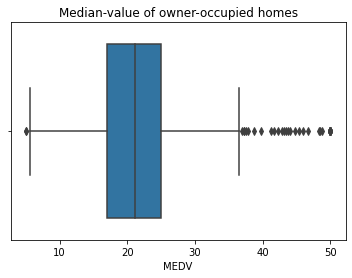

In [16]:
ax=sns.boxplot(x='MEDV', data=boston_df)
ax.set_title("Median-value of owner-occupied homes")

There are several outliers with large values and some with smaller values. T

The mean value is about 20 with a interquantile range (IQR) of about 10.

### Histogram for the Charles river variable

Text(0.5, 1.0, 'Histogram for Charles river variable')

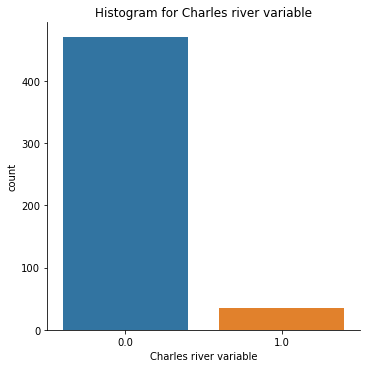

In [17]:
ax=sns.catplot(x="CHAS", kind='count', data=boston_df)
ax.set(xlabel="Charles river variable", ylabel="count")
plt.title("Histogram for Charles river variable")

Text(0, 0.5, 'count)')

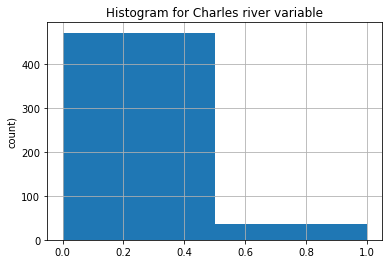

In [18]:
boston_df['CHAS'].hist(bins=2)
plt.title("Histogram for Charles river variable")
plt.ylabel('count)')

### Boxplot for the MEDV variable vs the AGE variabl

(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [21]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'MEDV vs AGE')

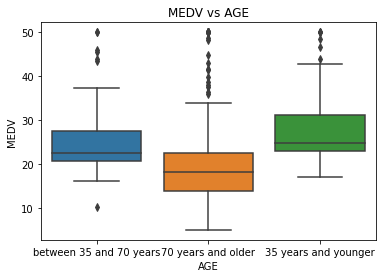

In [24]:
ax=sns.boxplot(x='age_group', y='MEDV', data=boston_df)
ax.set(xlabel="AGE", ylabel="MEDV")
plt.title("MEDV vs AGE")

### scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 


Text(0.5, 1.0, 'NOX vs INDUS')

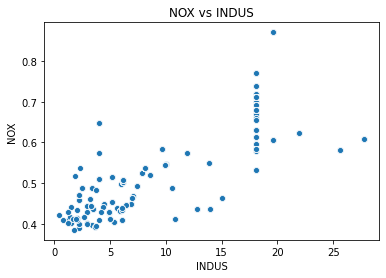

In [27]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title("NOX vs INDUS")

It maybe a linear relationship between these two variables

### Histogram for the pupil to teacher ratio variable

Text(0, 0.5, 'Count')

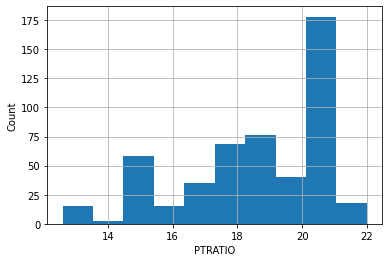

In [30]:
boston_df['PTRATIO'].hist()
plt.xlabel('PTRATIO')
plt.ylabel('Count')

There are several vases larger than 20 ratio

# Statistical Analysis

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

alpha_value = 0.05


#### T Test

In [33]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

H0 : the median value of houses bounded by the river and the other are equal

The P value is smaller than o.05 so we reject the null hypothesis. So there is Significant difference between the median of these two sets

#### Levene's Test

In [48]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [37]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy  = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [38]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


H0=the median value of the three samples are equal

As the P-value of the ANOVA is 1.711e-15 < 0.05, that is the alpha value considered, the null hypothesis H0 ( is false, and so there is statistical evidence to reject it and consider that the three sets have different median value.

In [46]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is larger than 0.05, the variance are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

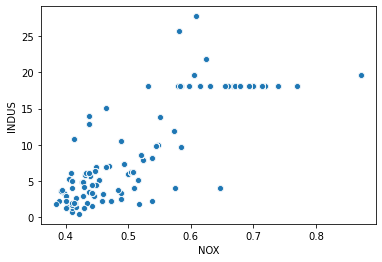

In [39]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [41]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

H0: NOX and INDUS variables are not correlated

The P-value of the Pearson correlation test is less than 0.05, so we can reject the null hypothes.Thus, there is a relationship between two variables. 

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [49]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.21e-08
Time:                        21:37:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As the P-value of the regression related to the variable DIS is 0.0 < 0.05, that is the alpha value considered, there is statistical evidence to consider a positive relationship between the variable DIS which describes the weighted distance of the house to the five Boston employment centres and the median value of owner occupied house (MEDV).